<a href="https://colab.research.google.com/github/franhinomut/TFM_easyMoney/blob/develop/tfm_02_05_23_sandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RFM Easy_Money
Francesc
Antonio
Sandra
Cristina

## 1. Imports

In [ ]:
#Importamos librerías
import sys
import os 

import numpy as np # Arrays
import pandas as pd # Series and Dataframes

import matplotlib.pyplot as plt 
import seaborn as sns # Advanced Plotting 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from google.colab import files #para importar desde google
from google.colab import drive

pd.options.display.max_rows = 100
plt.style.use('ggplot') # Beautify Plots 

In [ ]:
#A nivel de modelos
from sklearn import model_selection
import xgboost as xgb #este es para hacer decision trees

In [ ]:
#Estas funciones son para hacer transformaciones
from scipy import stats
from datetime import datetime

In [ ]:
#librería para hacer números random
import random

In [ ]:
#json se utiliza para bd de nosql, pero es parecido a los diccionarios de phyton. normalmente tiene esta forma {'ggg`: 'zzzz'}
#Cuando se importa de googlemaps, eso está guardado en un json

import random
import json
from pandas import json_normalize

In [ ]:
#para poder los datos tenemos que montar el drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Conectar el drive donde tenemos el csv que queremos leer

In [ ]:
df=pd.read_csv(r"/content/gdrive/MyDrive/a. Nuclio/entregas/easy_money/df_easy.csv",sep=",")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915793 entries, 0 to 915792
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   pk_sale             915793 non-null  int64  
 1   pk_cid              915793 non-null  int64  
 2   month_sale          915793 non-null  object 
 3   pk_product_ID       915793 non-null  int64  
 4   net_margin          915793 non-null  float64
 5   product_desc        915793 non-null  object 
 6   family_product      915793 non-null  object 
 7   entry_date          915793 non-null  object 
 8   entry_channel       915793 non-null  object 
 9   active_customer     915793 non-null  float64
 10  segment             915793 non-null  object 
 11  country_id          915793 non-null  object 
 12  region_code         915793 non-null  float64
 13  gender              915793 non-null  object 
 14  age                 915793 non-null  int64  
 15  deceased            915793 non-nul

In [ ]:
#analizamos los tipos de datos que tenemos, para que cada variable tenga el tipo de dato adecuado

In [ ]:
#se cambia el formato de las variables de fecha a formato de fecha

In [ ]:
df['month_sale'] = pd.to_datetime(df['month_sale'])

In [ ]:
df['entry_date'] = pd.to_datetime(df['entry_date'])

In [ ]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915793 entries, 0 to 915792
Columns: 32 entries, pk_sale to em_acount
dtypes: datetime64[ns](2), float64(6), int64(17), object(7)
memory usage: 223.6+ MB


In [ ]:
df.head().T

,0,1,2,3,4
pk_sale,6666,6666,6666,130018,130018
pk_cid,33620,33620,33620,33620,33620
month_sale,2018-05-01 00:00:00,2018-05-01 00:00:00,2018-05-01 00:00:00,2018-04-01 00:00:00,2018-04-01 00:00:00
pk_product_ID,2335,2335,2335,4657,4657
net_margin,952.9,952.9,952.9,71.6,71.6
product_desc,short_term_deposit,short_term_deposit,short_term_deposit,em_acount,em_acount
family_product,investment,investment,investment,account,account
entry_date,2018-04-01 00:00:00,2018-04-01 00:00:00,2018-04-01 00:00:00,2018-04-01 00:00:00,2018-04-01 00:00:00
entry_channel,KHK,KHK,KHK,KHK,KHK
active_customer,1.0,1.0,1.0,1.0,1.0


In [ ]:
#vemos si hay nulos (aunque ya sabemos que no porque el csv esta limpio de nulos)

In [ ]:
df.isnull().sum()

pk_sale               0
pk_cid                0
month_sale            0
pk_product_ID         0
net_margin            0
product_desc          0
family_product        0
entry_date            0
entry_channel         0
active_customer       0
segment               0
country_id            0
region_code           0
gender                0
age                   0
deceased              0
salary                0
short_term_deposit    0
loans                 0
mortgage              0
funds                 0
securities            0
long_term_deposit     0
em_account_pp         0
credit_card           0
payroll               0
pension_plan          0
payroll_account       0
emc_account           0
debit_card            0
em_account_p          0
em_acount             0
dtype: int64

In [ ]:
#vemos si hay duplicados (aunque ya sabemos que no porque el csv esta limpio de duplicados)

In [ ]:
df[df.duplicated(keep=False)]

,pk_sale,pk_cid,month_sale,pk_product_ID,net_margin,product_desc,family_product,entry_date,entry_channel,active_customer,...,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount


In [ ]:
#para analizar el margen por tipo de segmento de cliente:
#len nos dice la cantidad de clientes en ese segmento
#sum es la suma total del margen en ese segmento, para todo el intervalo de tiempo del dataset
#mean es la media del margen por tipo de segmento de cliente

df.pivot_table(index='segment',values='net_margin',aggfunc=[len,np.sum,np.mean])

,len,sum,mean
,net_margin,net_margin,net_margin
segment,,,
01 - TOP,49436,32149357.9,650.322799
02 - PARTICULARES,450598,379993076.7,843.308396
03 - UNIVERSITARIO,285923,215470062.0,753.594716
04 - OTRO,129836,43453237.7,334.677884


In [ ]:
#lo ordenamos un poco mejor:
df.pivot_table(index='segment',values='net_margin',aggfunc=[len,np.sum,np.mean]).sort_values(by=[('mean','net_margin')],ascending=False)

,len,sum,mean
,net_margin,net_margin,net_margin
segment,,,
02 - PARTICULARES,450598,379993076.7,843.308396
03 - UNIVERSITARIO,285923,215470062.0,753.594716
01 - TOP,49436,32149357.9,650.322799
04 - OTRO,129836,43453237.7,334.677884


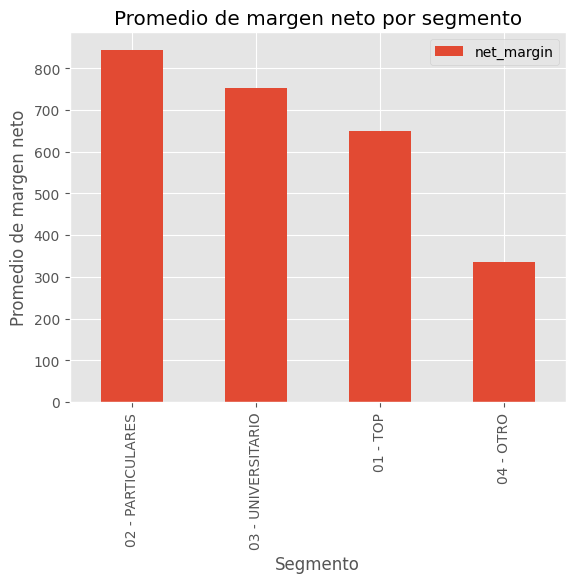

In [ ]:
df.pivot_table(index='segment',values='net_margin',aggfunc=[len,np.sum,np.mean]).sort_values(by=[('mean','net_margin')],ascending=False)['mean'].plot(kind='bar')
plt.title('Promedio de margen neto por segmento')
plt.xlabel('Segmento')
plt.ylabel('Promedio de margen neto')
plt.show()

In [ ]:
#para analizar el margen por familia de productos:
df.pivot_table(index='family_product',values='net_margin',aggfunc=[len,np.sum,np.mean]).sort_values(by=[('mean','net_margin')],ascending=False)

,len,sum,mean
,net_margin,net_margin,net_margin
family_product,,,
pension_plan,92029,549967942.7,5976.028672
loan,179,411594.8,2299.412291
investment,45584,68069652.5,1493.279495
account,594650,41613463.5,69.979759
payment_card,183351,11003080.8,60.011021


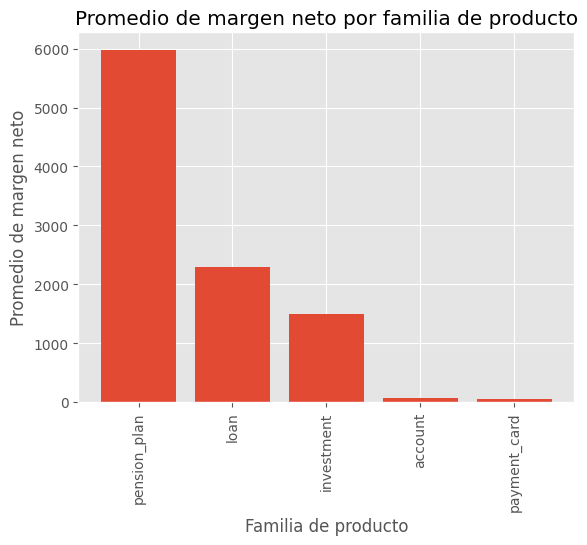

In [ ]:
# Crea la tabla dinámica y ordena los valores por el promedio de net_margin de mayor a menor
tabla = df.pivot_table(index='family_product', values='net_margin', aggfunc=[len,np.sum,np.mean]).sort_values(by=[('mean','net_margin')], ascending=False)

# Extrae la columna de la media y grafica un gráfico de barras
plt.bar(tabla.index, tabla[('mean', 'net_margin')])

# Añade títulos y etiquetas a los ejes
plt.title('Promedio de margen neto por familia de producto')
plt.xlabel('Familia de producto')
plt.ylabel('Promedio de margen neto')

# Gira las etiquetas del eje x para que sean más legibles
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()

In [ ]:
#Podemos decir que:
#El plan de pensiones es el que mayor rentabilidad tiene, seguido de los préstamos
#El segmento de cliente con mayor margen es el de particulares, seguido del de universitarios

In [ ]:
#Analizamos la familia de productos que se contrata por cada segmento de cliente
df.groupby('segment')['family_product'].value_counts()

segment             family_product
01 - TOP            account            27852
                    investment         13791
                    payment_card        6227
                    pension_plan        1563
                    loan                   3
02 - PARTICULARES   account           264047
                    payment_card      107492
                    pension_plan       52992
                    investment         25954
                    loan                 113
03 - UNIVERSITARIO  account           194362
                    payment_card       56515
                    pension_plan       32415
                    investment          2570
                    loan                  61
04 - OTRO           account           108389
                    payment_card       13117
                    pension_plan        5059
                    investment          3269
                    loan                   2
Name: family_product, dtype: int64

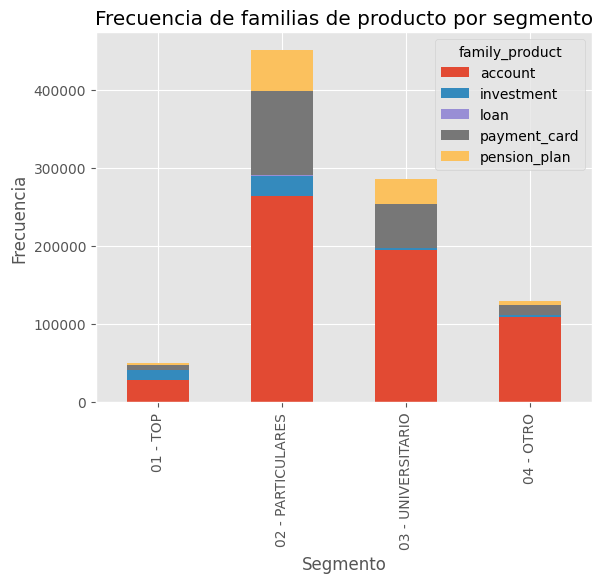

In [ ]:
# Crea una tabla de frecuencia utilizando la función "value_counts()"
tabla3 = df.groupby('segment')['family_product'].value_counts()

# Convierte la tabla en un DataFrame
df_tabla = tabla3.unstack(level=1)

# Grafica el DataFrame como un gráfico de barras apilado
df_tabla.plot(kind='bar', stacked=True)

# Añade títulos y etiquetas a los ejes
plt.title('Frecuencia de familias de producto por segmento')
plt.xlabel('Segmento')
plt.ylabel('Frecuencia')

# Muestra el gráfico
plt.show()

In [ ]:
#observamos que lo más tipico que contratan los clientes son cuentas y prodcutos de inversion, pero hemos visto que esos son los productos 
#que pero margen tienen. Habria que impulsar la contratacion de prestamos (loan) y planes de pensiones que es lo que mayor margen parece dar.

In [ ]:
#para saber cuantos clientes tenemos en el dataframe, podemos averiguar cuantos pk_cid unicos hay
df['pk_cid'].nunique()

152754

entry_month
2015-01      412
2015-02      394
2015-03      376
2015-04      402
2015-05      567
2015-06      494
2015-07     1186
2015-08     1224
2015-09     1239
2015-10     1762
2015-11     1226
2015-12      723
2016-01      657
2016-02      538
2016-03      479
2016-04      652
2016-05      604
2016-06      571
2016-07     1235
2016-08     1473
2016-09     1482
2016-10     2043
2016-11     1367
2016-12      999
2017-01     1049
2017-02      934
2017-03      968
2017-04      920
2017-05      927
2017-06     1124
2017-07     2008
2017-08     1609
2017-09     2484
2017-10     3068
2017-11     2383
2017-12     2210
2018-01     2254
2018-02     3333
2018-03     2901
2018-04     2650
2018-05     2668
2018-06     2601
2018-07    14743
2018-08    12077
2018-09    18819
2018-10    18342
2018-11     9989
2018-12     4230
2019-01     5015
2019-02     4165
2019-03     3140
2019-04     2506
2019-05     1535
Freq: M, Name: pk_cid, dtype: int64


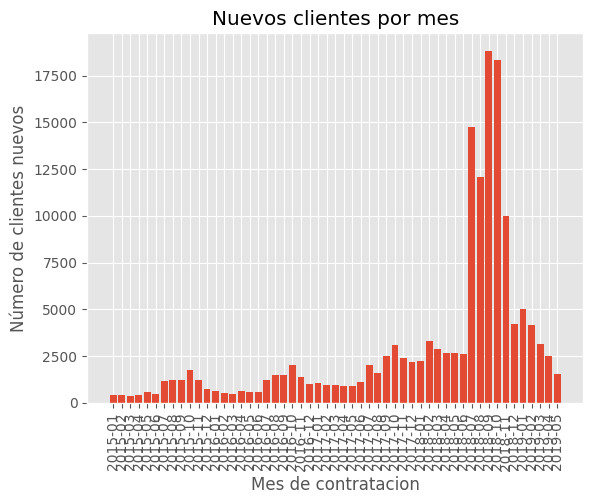

In [ ]:
#para saber los nuevos clientes que entran cada mes, de toda la historia del dataset.
df['entry_month'] = df['entry_date'].dt.to_period('M') # crear nueva columna con mes de entrada
new_clients = df.groupby('entry_month')['pk_cid'].nunique() # agrupar por mes de entrada y contar clientes únicos.
print(new_clients)
plt.bar(new_clients.index.astype(str), new_clients.values, width=0.8)

# Añadir etiquetas de eje y título
plt.xlabel('Mes de contratacion')
plt.ylabel('Número de clientes nuevos')
plt.title('Nuevos clientes por mes')
plt.xticks(rotation=90)
plt.show()


In [ ]:
df['month_sale'] = df['month_sale'].dt.to_period('M') # crear nueva columna con mes de venta
sales_per_month = df.groupby('month_sale')['pk_sale'].count() # agrupar por mes de venta y contar ventas


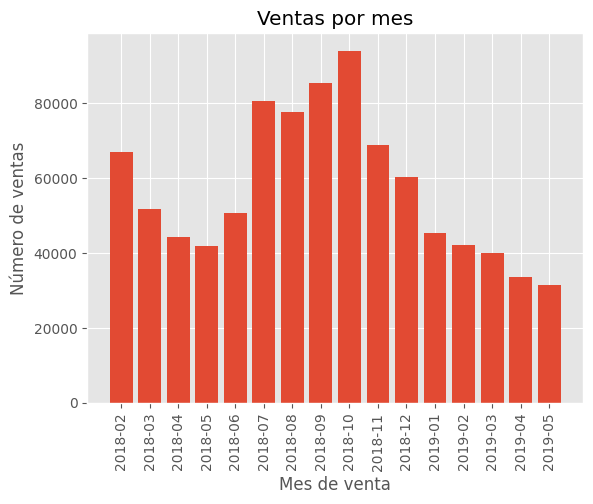

In [ ]:
# Crear un histograma de barras para las ventas por mes
sales_per_month = df.groupby('month_sale')['pk_sale'].count()
plt.bar(sales_per_month.index.astype(str), sales_per_month.values, width=0.8)

# Añadir etiquetas de eje y título
plt.xlabel('Mes de venta')
plt.ylabel('Número de ventas')
plt.title('Ventas por mes')
plt.xticks(rotation=90)
plt.show()


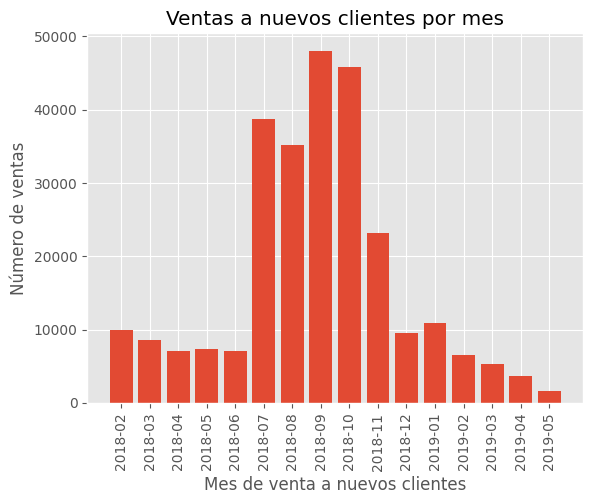

In [ ]:
# Crear un histograma de barras para las ventas por mes a clientes nuevos
new_clients_sales_per_month = df[df['month_sale'] == df['entry_month']].groupby('month_sale')['pk_sale'].count() # filtrar ventas a nuevos clientes y contar ventas por mes de venta
plt.bar(new_clients_sales_per_month.index.astype(str), new_clients_sales_per_month.values, width=0.8)

# Añadir etiquetas de eje y título
plt.xlabel('Mes de venta a nuevos clientes')
plt.ylabel('Número de ventas')
plt.title('Ventas a nuevos clientes por mes')
plt.xticks(rotation=90)
plt.show()


<Axes: title={'center': 'Ventas a clientes antiguos por mes'}, xlabel='Mes de venta', ylabel='Número de ventas'>

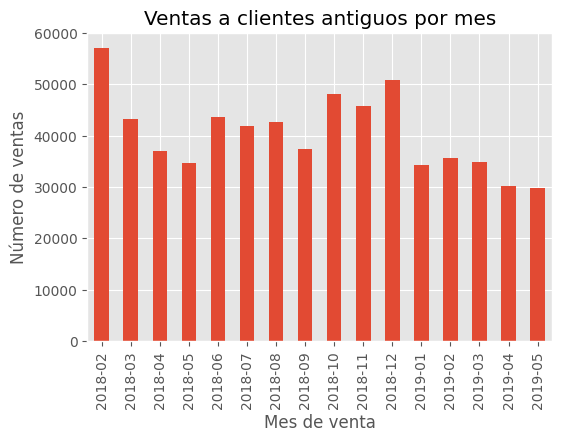

In [ ]:
#ventas por mes a clientes antiguos (contratados anteriormente a ese mes)

# agrupar por mes de venta y contar las ventas de clientes que entraron antes de ese mes
sales_clients_ant = df[df['entry_month'] < df['month_sale']].groupby('month_sale').size()

# visualizar en un gráfico de barras
sales_clients_ant.plot(kind='bar', xlabel='Mes de venta', ylabel='Número de ventas', title='Ventas a clientes antiguos por mes', figsize=(6, 4))


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915793 entries, 0 to 915792
Data columns (total 33 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   pk_sale             915793 non-null  int64         
 1   pk_cid              915793 non-null  int64         
 2   month_sale          915793 non-null  period[M]     
 3   pk_product_ID       915793 non-null  int64         
 4   net_margin          915793 non-null  float64       
 5   product_desc        915793 non-null  object        
 6   family_product      915793 non-null  object        
 7   entry_date          915793 non-null  datetime64[ns]
 8   entry_channel       915793 non-null  object        
 9   active_customer     915793 non-null  float64       
 10  segment             915793 non-null  object        
 11  country_id          915793 non-null  object        
 12  region_code         915793 non-null  float64       
 13  gender              915793 no

In [ ]:
df_description = df.describe(include = 'all').T

<ipython-input-36-f89be2f66e6b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_description = df.describe(include = 'all').T


In [ ]:
df_description.to_csv('df_description.csv')

In [ ]:
files.download('df_description.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#NUEVO

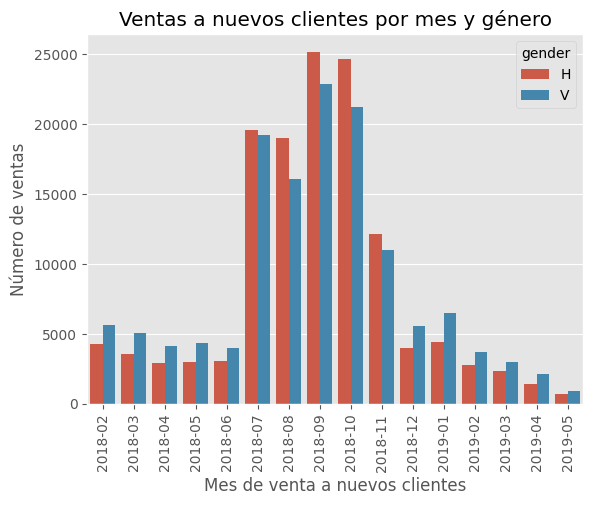

In [ ]:
# Crear un histograma de barras para las ventas por mes a clientes nuevos por género
new_clients_sales_per_month = df[df['month_sale'] == df['entry_month']].groupby(['month_sale', 'gender'])['pk_sale'].count().reset_index()

sns.barplot(x='month_sale', y='pk_sale', hue='gender', data=new_clients_sales_per_month)
plt.title('Ventas a nuevos clientes por mes y género')
plt.xlabel('Mes de venta a nuevos clientes')
plt.ylabel('Número de ventas')
plt.xticks(rotation=90)
plt.show()

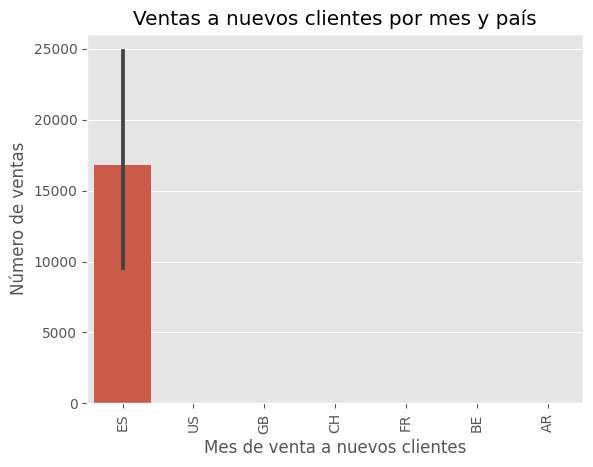

In [ ]:
# Crear un histograma de barras para las ventas por mes a clientes nuevos por país
new_clients_sales_per_month3 = df[df['month_sale'] == df['entry_month']].groupby(['month_sale', 'country_id'])['pk_sale'].count().reset_index()

sns.barplot(x='country_id', y='pk_sale', data=new_clients_sales_per_month3)
plt.title('Ventas a nuevos clientes por mes y país')
plt.xlabel('Mes de venta a nuevos clientes')
plt.ylabel('Número de ventas')
plt.xticks(rotation=90)
plt.show()

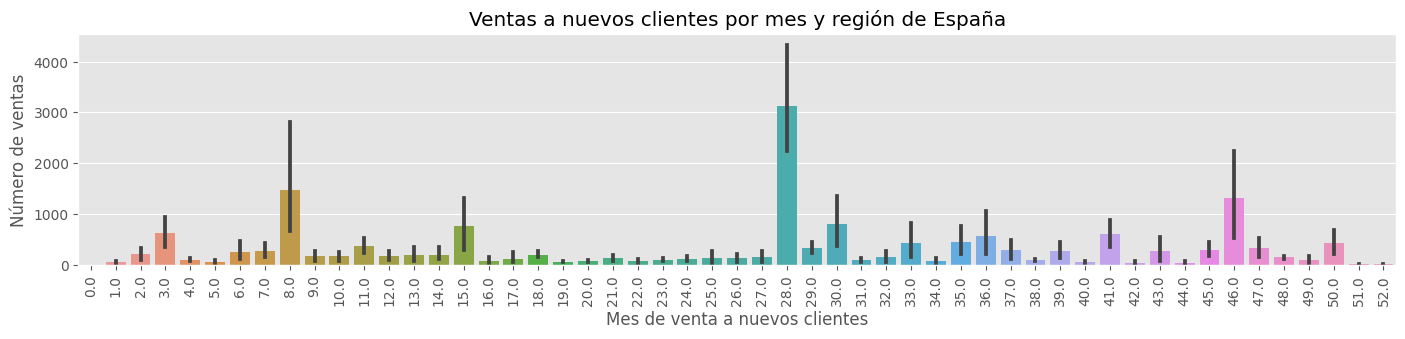

In [ ]:
# Crear un histograma de barras para las ventas por mes a clientes nuevos por región de España
new_clients_sales_per_month4 = df[df['month_sale'] == df['entry_month']].groupby(['month_sale', 'region_code'])['pk_sale'].count().reset_index()

plt.figure(figsize=(17, 3))

sns.barplot(x='region_code', y='pk_sale', data=new_clients_sales_per_month4)
plt.title('Ventas a nuevos clientes por mes y región de España')
plt.xlabel('Mes de venta a nuevos clientes')
plt.ylabel('Número de ventas')
plt.xticks(rotation=90)
plt.show()

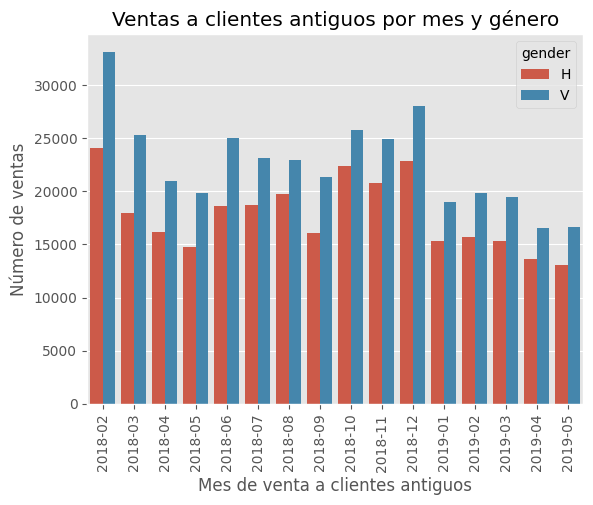

In [ ]:
# agrupar por mes de venta y contar las ventas de clientes antiguos

ant_clients_sales_per_month = df[df['month_sale'] > df['entry_month']].groupby(['month_sale', 'gender'])['pk_sale'].count().reset_index()

sns.barplot(x='month_sale', y='pk_sale', hue='gender', data=ant_clients_sales_per_month)
plt.title('Ventas a clientes antiguos por mes y género')
plt.xlabel('Mes de venta a clientes antiguos')
plt.ylabel('Número de ventas')
plt.xticks(rotation=90)
plt.show()

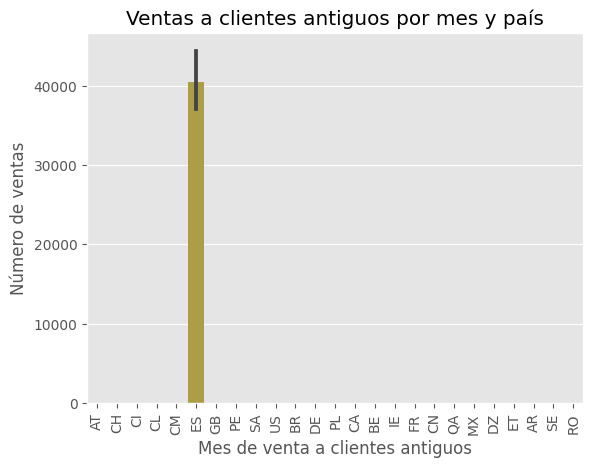

In [ ]:
# Crear un histograma de barras para las ventas por mes a clientes antiguos por país
ant_clients_sales_per_month3 = df[df['month_sale'] > df['entry_month']].groupby(['month_sale', 'country_id'])['pk_sale'].count().reset_index()

sns.barplot(x='country_id', y='pk_sale', data=ant_clients_sales_per_month3)
plt.title('Ventas a clientes antiguos por mes y país')
plt.xlabel('Mes de venta a clientes antiguos')
plt.ylabel('Número de ventas')
plt.xticks(rotation=90)
plt.show()

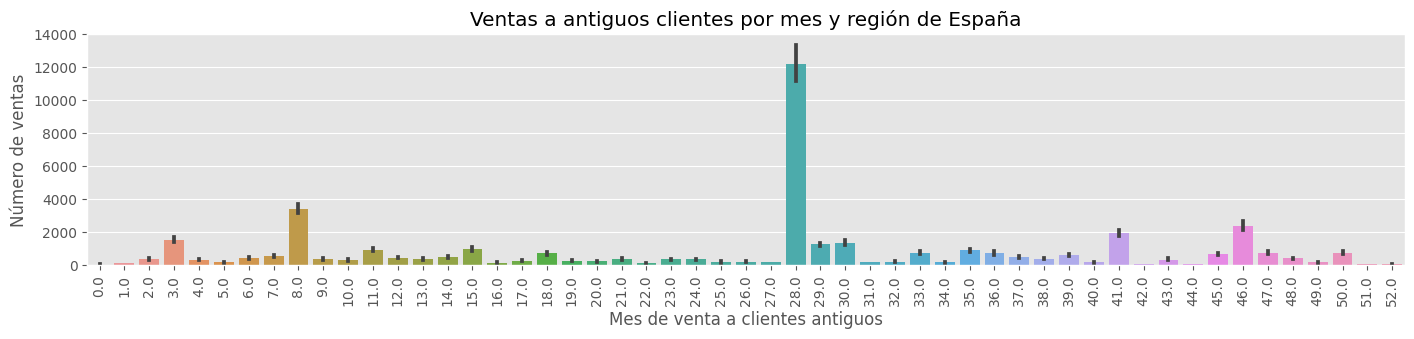

In [ ]:
# Crear un histograma de barras para las ventas por mes a clientes antiguos por región de España
ant_clients_sales_per_month4 = df[df['month_sale'] > df['entry_month']].groupby(['month_sale', 'region_code'])['pk_sale'].count().reset_index()

plt.figure(figsize=(17, 3))

sns.barplot(x='region_code', y='pk_sale', data=ant_clients_sales_per_month4)
plt.title('Ventas a antiguos clientes por mes y región de España')
plt.xlabel('Mes de venta a clientes antiguos')
plt.ylabel('Número de ventas')
plt.xticks(rotation=90)
plt.show()

* ANÁLISIS DEL TARGET

In [ ]:
TARGET= 'net_margin'

In [ ]:
df[TARGET].describe()

count    915793.000000
mean        732.770107
std        1916.633977
min          25.000000
25%          61.400000
50%          69.300000
75%          80.200000
max       18466.400000
Name: net_margin, dtype: float64

La distribución está muy a la derecha, el margen de la media está en sólo el 25 porciento final de la distribucion. Tendremos que realizar técnicas para datasets desbalanceados como escalas logarítmicas o eliminar outliers.

<ipython-input-47-b7b2aec8331a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='net_margin', ylabel='Density'>

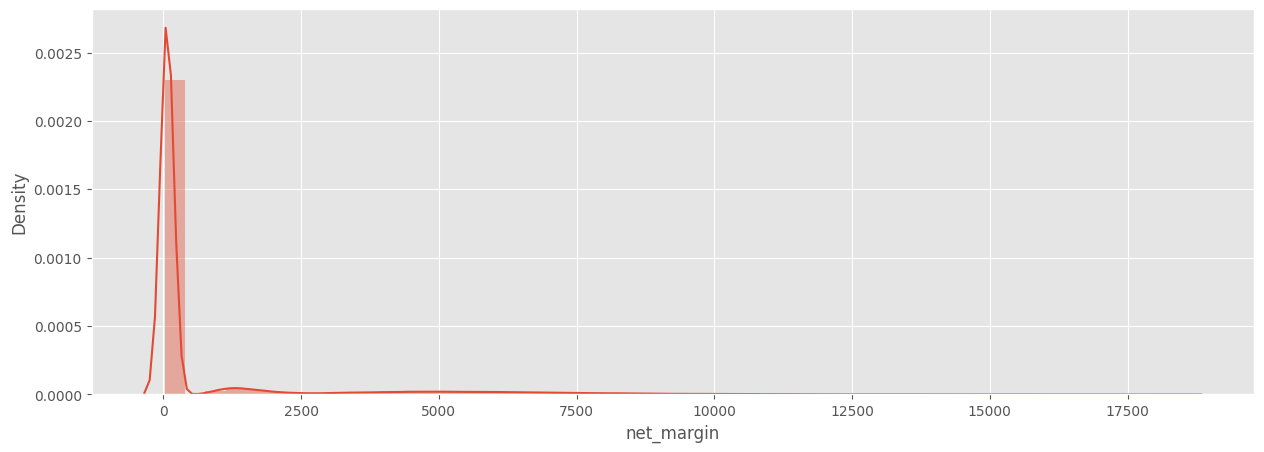

In [ ]:
# Distribución de la variable target al completo
plt.figure(figsize=(15, 5))
sns.distplot(
    df[TARGET])

In [ ]:
#Se hará un análisis de los datos que estén en el 10% a la derecha de la distribución 
q = df[TARGET].quantile(0.9)

# Selecciona las filas donde el valor de "Target" es mayor que el cuantil del 90%
df_filtrado = df[df[TARGET] > q]

minimo = df_filtrado[TARGET].min()
maximo = df_filtrado[TARGET].max()

# Muestra los valores mínimos y máximos
print("Valor mínimo de Target:", minimo)
print("Valor máximo de Target:", maximo)

Valor mínimo de Target: 2499.1
Valor máximo de Target: 18466.4


Aquí puede verse que el 10% de la muestra tiene valores muy superiores a la media de nuestros clientes.

<ipython-input-49-64ab2192983d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='net_margin', ylabel='Density'>

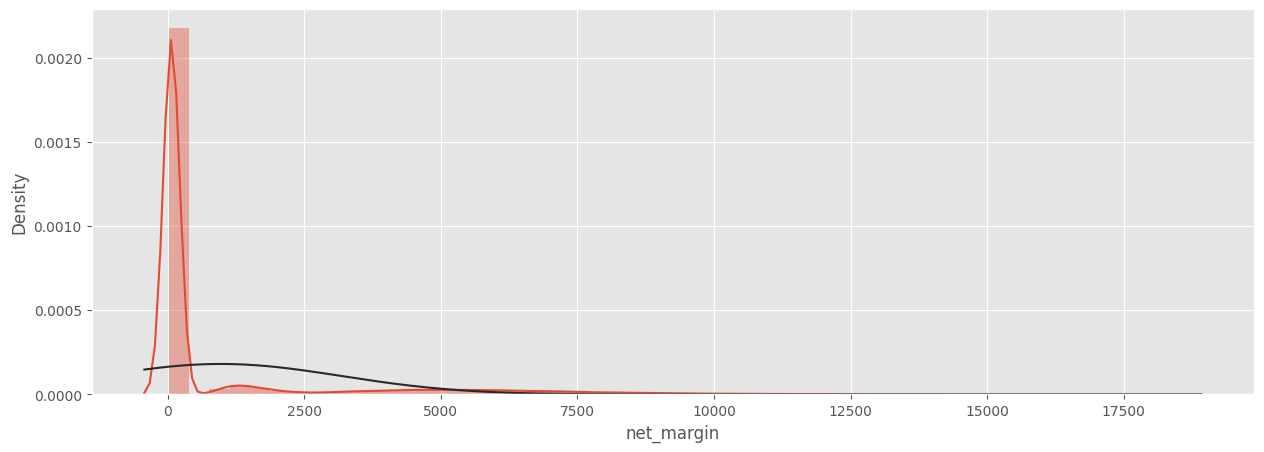

In [ ]:
#Se realizará solo las transformaciones logarítmicas de la distribución de los clientes antiguos que son los que a la
#gerencia. 

df['cliente_antiguo'] = np.where(df['month_sale'] > df['entry_month'], 1, 0)

plt.figure(figsize=(15, 5))
sns.distplot(
    df[df['cliente_antiguo'] == 1]['net_margin'],
    fit = stats.norm
)




In [ ]:
#hacemos escala logarítmica para nuestro Target
df['net_margin_log'] = df['net_margin'].apply(lambda x: np.log1p(x))

In [ ]:
TARGET_LN= 'net_margin_log'

<ipython-input-60-c8c31feaa91a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='net_margin_log', ylabel='Density'>

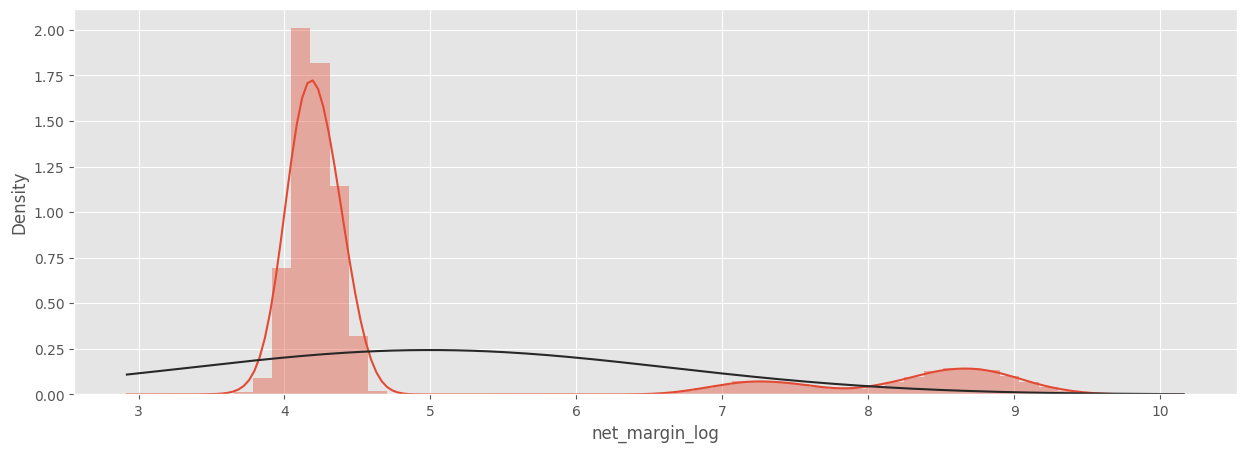

In [ ]:
plt.figure(figsize=(15, 5))
sns.distplot(
    df[df['cliente_antiguo'] == 1][TARGET_LN],
    fit = stats.norm)

COMENTARIOS: 
1) nos muestra los outliers que tenemos hacia la derecha y el resto de la distribución ya ajustada a una distribución normal para los clientes antiguos

# Analisis de variables con el target

In [ ]:
#FUNCIONES PARA ANÁLISIS DE VARIABLES

In [ ]:
#Función para graficar
def plot_cat_values(dataframe, column, target_column):
    plt.figure(figsize=(15,8))
    #en una única grafica de 2x1 en el primer slot
    ax1 = plt.subplot(2,1,1)
    ## Graficamos el conteo de cada uno de los valores
    ax1 = sns.countplot(
        data = dataframe,
        x= column,
        order = list(dataframe[column].unique())
    )
    plt.xticks(rotation=45)

    ax2 = plt.subplot(2,1,2) # share ax1 para que me pinte el axis en el mismo orden
    ## Graficamos la distribución del target sólo para aquellos casos con target > 0 (para que no se chafe el BP) 
    ax2 = sns.boxenplot(
        data = dataframe[dataframe[target_column] > 0], 
        x = column,
        y = target_column,
        order = list(dataframe[column].unique())
    )
    
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
#Función para variables categóricas

def explore_cat_values(dataframe, column, target_column):
    _results_df = dataframe[dataframe['cliente_antiguo'] == 1].pivot_table(index=column, values=target_column, aggfunc=[len, np.mean])
    _results_df.columns = ['serv_contratados', 'media_margen_neto_ln']
    _results_df['n_rows'] = dataframe[column].value_counts(dropna=False)
    _results_df['pct_rows'] = dataframe[column].value_counts(normalize=True, dropna=False)
    _results_df['pct_serv_contratados'] = _results_df['serv_contratados'] / _results_df['n_rows']
    _results_df = _results_df[['n_rows', 'pct_rows', 'serv_contratados', 'pct_serv_contratados', 'media_margen_neto_ln']].sort_values(by=('n_rows'), ascending=False)
    return _results_df



Variable: product_desc

In [ ]:
df['product_desc'].describe()

count        915793
unique           13
top       em_acount
freq         366261
Name: product_desc, dtype: object

COMENTARIO: 
* La variable no tiene nulos.
* Tiene 13 etiquetas distintas
* La top es em_acount en donde 4 de cada 10 clientes tienen contratado este producto.
* Se hará un one hot encoding. 

In [ ]:
df['product_desc'].value_counts(dropna=False)

em_acount             366261
debit_card            158414
pension_plan           92029
payroll                89167
payroll_account        85464
emc_account            53758
credit_card            24937
short_term_deposit     19671
long_term_deposit      16882
securities              5199
funds                   3832
loans                    131
mortgage                  48
Name: product_desc, dtype: int64

In [ ]:
df['product_desc'].value_counts(normalize=True, dropna=False)

em_acount             0.399939
debit_card            0.172980
pension_plan          0.100491
payroll               0.097366
payroll_account       0.093322
emc_account           0.058701
credit_card           0.027230
short_term_deposit    0.021480
long_term_deposit     0.018434
securities            0.005677
funds                 0.004184
loans                 0.000143
mortgage              0.000052
Name: product_desc, dtype: float64

In [ ]:
#Se realiza el análisis sólo para los clientes antiguos
df[df['cliente_antiguo'] == 1].pivot_table(index='product_desc', values=TARGET_LN, aggfunc=[len, np.mean])

,len,mean
,net_margin_log,net_margin_log
product_desc,,
credit_card,24797,4.108567
debit_card,155388,4.107475
em_acount,116000,4.252537
emc_account,53382,4.253224
funds,3786,7.264884
loans,127,7.673937
long_term_deposit,15465,7.270473
mortgage,48,7.711975


In [ ]:
_results_df = df[df['cliente_antiguo'] == 1].pivot_table(index='product_desc', values=TARGET_LN, aggfunc=[len, np.mean]).sort_values(by=('len', TARGET_LN), ascending=False)

In [ ]:
_results_df.columns = ['serv_contratados', 'margen_neto_ln']

In [ ]:
_results_df.head()

,serv_contratados,margen_neto_ln
product_desc,,
debit_card,155388,4.107475
em_acount,116000,4.252537
pension_plan,89874,8.628815
payroll,87063,4.251465
payroll_account,83153,4.251639


In [ ]:
_results_df['n_rows'] = df['product_desc'].value_counts(dropna=False)

In [ ]:
_results_df.head()

,serv_contratados,margen_neto_ln,n_rows
product_desc,,,
debit_card,155388,4.107475,158414
em_acount,116000,4.252537,366261
pension_plan,89874,8.628815,92029
payroll,87063,4.251465,89167
payroll_account,83153,4.251639,85464


In [ ]:
_results_df['pct_rows'] = df['product_desc'].value_counts(normalize=True, dropna=False)

In [ ]:
_results_df.head()

,serv_contratados,margen_neto_ln,n_rows,pct_rows
product_desc,,,,
debit_card,155388,4.107475,158414,0.172980
em_acount,116000,4.252537,366261,0.399939
pension_plan,89874,8.628815,92029,0.100491
payroll,87063,4.251465,89167,0.097366
payroll_account,83153,4.251639,85464,0.093322


In [ ]:
_results_df['pct_serv_contratados'] = _results_df['serv_contratados'] / _results_df['n_rows']

In [ ]:
_results_df.head()

,serv_contratados,margen_neto_ln,n_rows,pct_rows,pct_serv_contratados
product_desc,,,,,
debit_card,155388,4.107475,158414,0.172980,0.980898
em_acount,116000,4.252537,366261,0.399939,0.316714
pension_plan,89874,8.628815,92029,0.100491,0.976583
payroll,87063,4.251465,89167,0.097366,0.976404
payroll_account,83153,4.251639,85464,0.093322,0.972959


In [ ]:
_results_df = _results_df[['n_rows', 'pct_rows', 'serv_contratados', 'pct_serv_contratados', 'margen_neto_ln']].sort_values(by=('n_rows'), ascending=False)

In [ ]:
_results_df

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,margen_neto_ln
product_desc,,,,,
em_acount,366261,0.399939,116000,0.316714,4.252537
debit_card,158414,0.172980,155388,0.980898,4.107475
pension_plan,92029,0.100491,89874,0.976583,8.628815
payroll,89167,0.097366,87063,0.976404,4.251465
payroll_account,85464,0.093322,83153,0.972959,4.251639
emc_account,53758,0.058701,53382,0.993006,4.253224
credit_card,24937,0.027230,24797,0.994386,4.108567
short_term_deposit,19671,0.021480,13175,0.669768,7.260602
long_term_deposit,16882,0.018434,15465,0.916064,7.270473


COMENTARIOS: 
* em_account es el servicio más contratado, sin embargo para los clientes antiguos solo representa el 31%.
* Los clientes antiguos tienen contratados casi el 100% de los servicios restantes. 
* Lo que indica que los clientes nuevos inician con el em_account y el otro producto que más contratan es el short_term_deposit



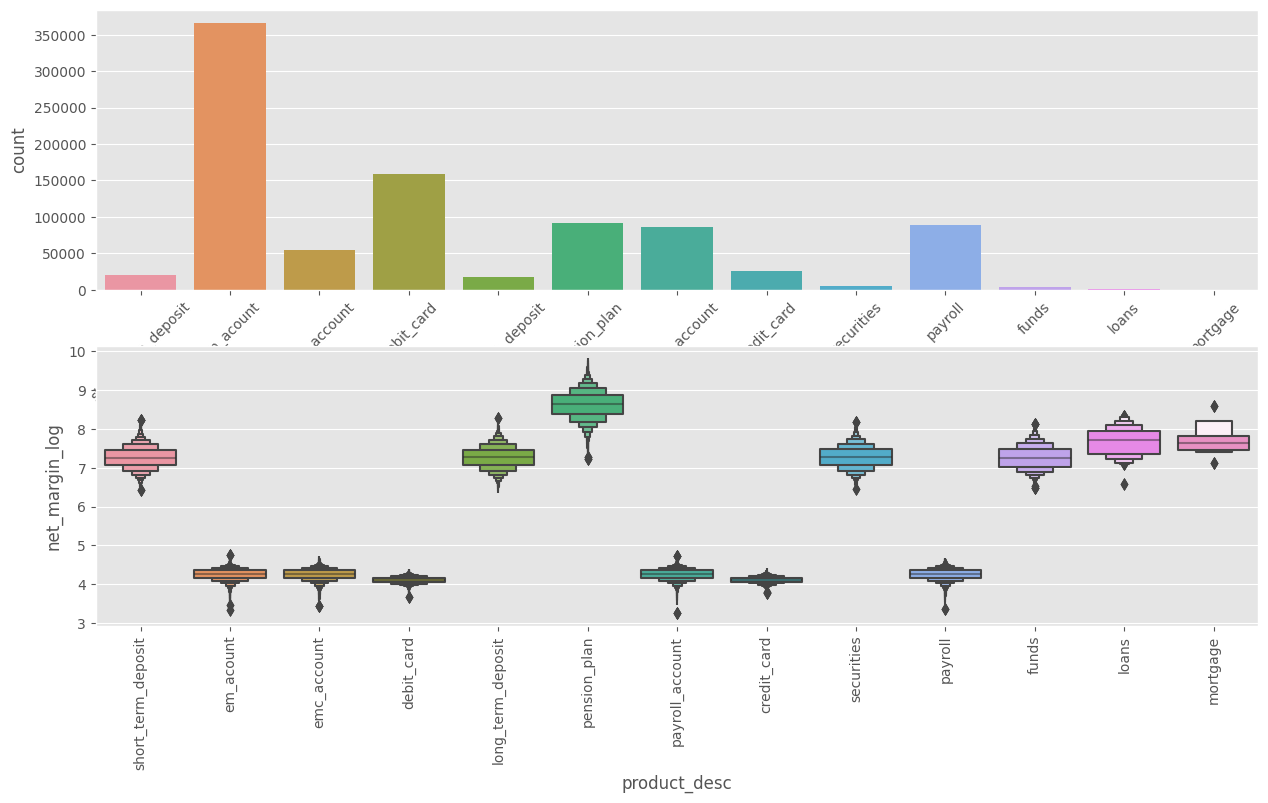

In [ ]:
plot_cat_values(df, 'product_desc', TARGET_LN)

In [ ]:
explore_cat_values(df, 'product_desc', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
product_desc,,,,,
em_acount,366261,0.399939,116000,0.316714,4.252537
debit_card,158414,0.172980,155388,0.980898,4.107475
pension_plan,92029,0.100491,89874,0.976583,8.628815
payroll,89167,0.097366,87063,0.976404,4.251465
payroll_account,85464,0.093322,83153,0.972959,4.251639
emc_account,53758,0.058701,53382,0.993006,4.253224
credit_card,24937,0.027230,24797,0.994386,4.108567
short_term_deposit,19671,0.021480,13175,0.669768,7.260602
long_term_deposit,16882,0.018434,15465,0.916064,7.270473


# Variable: family_product

In [ ]:
explore_cat_values(df, 'family_product', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
family_product,,,,,
account,594650,0.649328,339598,0.571089,4.252150
payment_card,183351,0.200210,180185,0.982733,4.107625
pension_plan,92029,0.100491,89874,0.976583,8.628815
investment,45584,0.049775,37499,0.822635,7.266480
loan,179,0.000195,175,0.977654,7.684370


COMENTARIO: 
* La familia más contratada es la de account. 
* Los clientes antiguos tienen la mayoría de familias contratadas a exepción de una ligera bajada del 82% en investment, y el 57% en account. 
* La familia con margen más rentable son los planes de pensiones, seguido de los loan e investment. 
* Se realizará un OHE

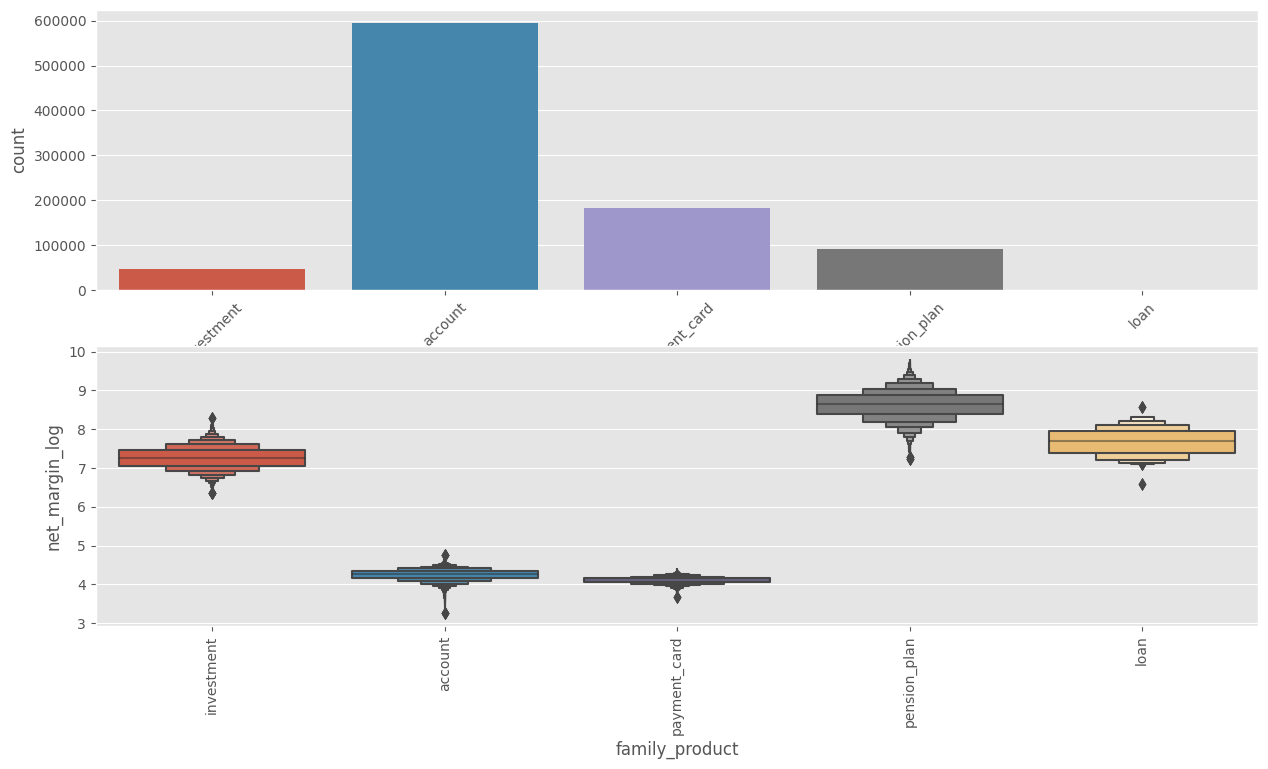

In [ ]:
plot_cat_values(df, 'family_product', TARGET_LN)

# Variable Entry_Channel

In [ ]:
df['entry_channel'].describe()


count     915793
unique        46
top          KFC
freq      129652
Name: entry_channel, dtype: object

La variable no tiene nulos. 
Tiene un total de 46 diferentes canales de entrada
El más frecuente es KFC
Se hará un OHE 

In [ ]:
df['entry_channel'].value_counts()

KFC    129652
ZZZ    128970
KHQ    120115
KHM    117064
KHE     99792
KHK     92483
KHN     80040
KAT     65295
RED     30298
KHL     21795
KFA     17529
KHO      6449
KHF      2263
KHD      1679
KAZ       768
KHC       668
KBG       202
KHP       158
007       114
013        81
KAG        47
KAS        43
KBZ        40
KAE        34
KEH        30
KCB        28
KAY        21
KCC        14
KAA        14
KAF        13
KCI        12
KDT        12
KFD        12
KBO        12
KAB         8
KAK         6
KFL         6
KDR         4
KGX         4
KAQ         4
KCK         3
KAM         3
KBW         2
KCH         2
KAJ         2
KDA         2
Name: entry_channel, dtype: int64

Se hará una lista con las diferentes entradas a partir de KBG con 202 valores.Se pondrá en 'otros' a el resto, para no tener problemas de baja varianza en las columnas que vamos a crear.

In [ ]:
channels_freq = df['entry_channel'].value_counts()
frequent_channels = channels_freq[channels_freq > 300]
frequent_channels_list = frequent_channels.index.to_list()
frequent_channels_list.append('Otros')
df['entry_channel'] = pd.Categorical(df['entry_channel'], categories=frequent_channels_list)
df['entry_channel'].fillna('Otros', inplace=True)



In [ ]:
df['entry_channel'].value_counts()

KFC      129652
ZZZ      128970
KHQ      120115
KHM      117064
KHE       99792
KHK       92483
KHN       80040
KAT       65295
RED       30298
KHL       21795
KFA       17529
KHO        6449
KHF        2263
KHD        1679
Otros       933
KAZ         768
KHC         668
Name: entry_channel, dtype: int64

In [ ]:
df['entry_channel'].value_counts(normalize=True, dropna=False)

KFC      0.141573
ZZZ      0.140829
KHQ      0.131160
KHM      0.127828
KHE      0.108968
KHK      0.100987
KHN      0.087400
KAT      0.071299
RED      0.033084
KHL      0.023799
KFA      0.019141
KHO      0.007042
KHF      0.002471
KHD      0.001833
Otros    0.001019
KAZ      0.000839
KHC      0.000729
Name: entry_channel, dtype: float64

In [ ]:
explore_cat_values(df, 'entry_channel', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
entry_channel,,,,,
KFC,129652,0.141573,128708,0.992719,5.075508
ZZZ,128970,0.140829,50842,0.394216,4.735799
KHQ,120115,0.131160,26743,0.222645,4.529598
KHM,117064,0.127828,80067,0.683959,4.911710
KHE,99792,0.108968,99638,0.998457,5.035904
KHK,92483,0.100987,74112,0.801358,5.141492
KHN,80040,0.087400,54543,0.681447,4.987536
KAT,65295,0.071299,63653,0.974853,5.042859
RED,30298,0.033084,25543,0.843059,5.057144


#Variable: Segment

In [ ]:
df['segment'].value_counts()

02 - PARTICULARES     450598
03 - UNIVERSITARIO    285923
04 - OTRO             129836
01 - TOP               49436
Name: segment, dtype: int64

In [ ]:
explore_cat_values(df, 'segment', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
segment,,,,,
02 - PARTICULARES,450598,0.492030,366989,0.814449,5.007542
03 - UNIVERSITARIO,285923,0.312214,190486,0.666214,4.985774
04 - OTRO,129836,0.141774,51326,0.395314,4.738332
01 - TOP,49436,0.053982,38530,0.779392,5.264940


#Variable= Country_id

In [ ]:
df['country_id'].value_counts()

ES    915444
GB       111
FR        54
CH        48
US        16
AR        15
CI        15
DE        14
SA        14
CL        12
CM         5
AT         5
BE         5
MX         4
PL         4
ET         4
IE         4
QA         3
CA         3
CN         3
DZ         2
BR         2
RO         2
PE         2
SE         2
Name: country_id, dtype: int64

In [ ]:
explore_cat_values(df, 'country_id', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
country_id,,,,,
ES,915444,0.999619,647014,0.706776,4.995119
GB,111,0.000121,96,0.864865,4.807045
FR,54,0.000059,48,0.888889,5.583667
CH,48,0.000052,46,0.958333,4.890968
US,16,0.000017,13,0.812500,4.914780
AR,15,0.000016,10,0.666667,4.224885
CI,15,0.000016,15,1.000000,5.371703
SA,14,0.000015,14,1.000000,6.106860
DE,14,0.000015,14,1.000000,4.226983


Variable: region_code

In [ ]:
df['region_code'].value_counts()

28.0    245008
8.0      78073
46.0     59065
41.0     40587
30.0     34279
3.0      34226
15.0     27933
29.0     25361
35.0     21310
11.0     20637
36.0     20552
33.0     18471
50.0     18386
47.0     16829
45.0     15343
18.0     14220
39.0     14158
7.0      12705
37.0     11780
14.0     10801
6.0      10449
12.0      9859
43.0      9419
48.0      8930
2.0       8815
13.0      8717
9.0       8415
21.0      7809
38.0      7542
24.0      7423
10.0      7249
23.0      6899
4.0       6719
17.0      5931
32.0      5306
26.0      5217
27.0      5158
19.0      4985
25.0      4891
20.0      4628
31.0      4231
49.0      3987
34.0      3808
16.0      3358
5.0       3321
40.0      3127
1.0       2927
22.0      2725
42.0      1590
44.0      1188
51.0       655
52.0       438
0.0        353
Name: region_code, dtype: int64

In [ ]:
explore_cat_values(df, 'region_code', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
region_code,,,,,
28.0,245008,0.267536,194997,0.795880,5.030445
8.0,78073,0.085252,54476,0.697757,5.038954
46.0,59065,0.064496,38037,0.643985,5.005255
41.0,40587,0.044319,30824,0.759455,4.964441
30.0,34279,0.037431,21304,0.621488,4.940265
3.0,34226,0.037373,24279,0.709373,4.979376
15.0,27933,0.030501,15649,0.560233,4.929341
29.0,25361,0.027693,19965,0.787232,4.996038
35.0,21310,0.023269,14197,0.666213,5.028450


Se tiene que hacer un procesamiento dependiendo del porcentaje más bajo de servicios contratados y el mayor número de servicios contratados por clientes antiguos y el mayor número de servicios contratados por clientes antiguos.

Variable: gender

In [ ]:
explore_cat_values(df, 'gender', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
gender,,,,,
V,497383,0.543117,362042,0.727894,4.986521
H,418410,0.456883,285289,0.681841,5.006014


Hay un porcentaje mayor de contrataciones en general por parte de los hombres
Tanto hombres como mujeres permanecen de un mes a otro en un 50%
El margen es practicamente el mismo entre hombres y mujeres.

In [ ]:
#creamos una columna nueva con el género numérico en donde 0 es hombre y 1 es mujer
df['gender_num'] = df['gender'].map({'V': 0, 'H': 1}).astype(int)



<Axes: xlabel='family_product', ylabel='count'>

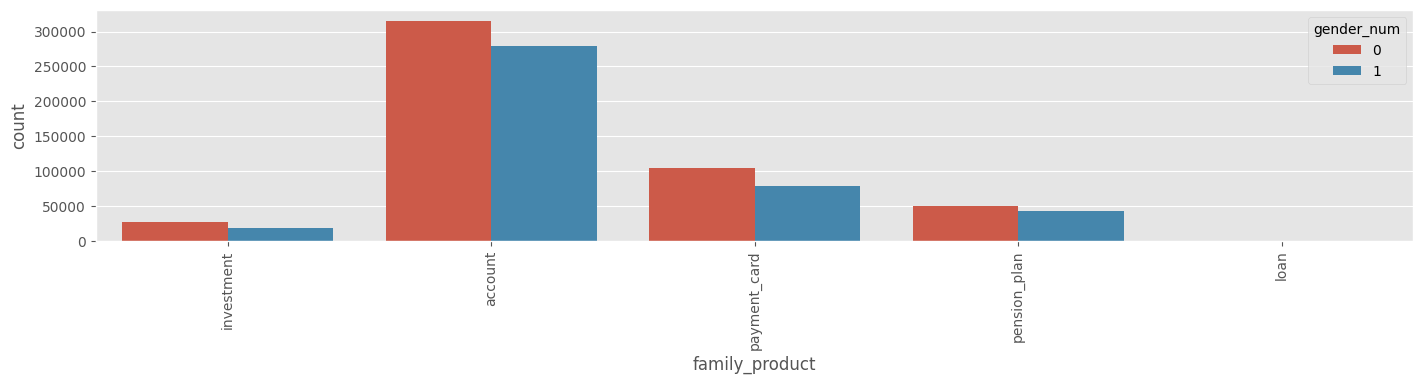

In [ ]:
plt.figure(figsize=[17,3])
plt.xticks(rotation=90)
sns.countplot(data=df, x='family_product', hue='gender_num')

<Axes: xlabel='segment', ylabel='count'>

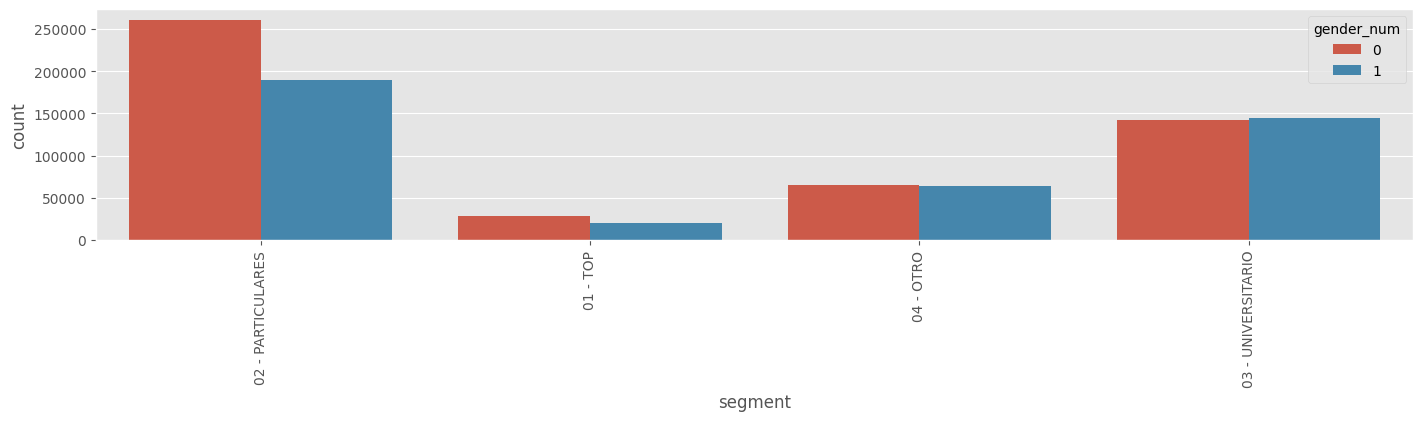

In [ ]:
plt.figure(figsize=[17,3])
plt.xticks(rotation=90)
sns.countplot(data=df, x='segment', hue='gender_num')

En la variable género no se ven diferencias entre los productos o los segmentos. En todas o bien el porcentaje de hombres es mayor o ligeramente parecido.

#Variable:deceased

In [ ]:
df['deceased'].value_counts()

N    915608
S       185
Name: deceased, dtype: int64

In [ ]:
explore_cat_values(df, 'deceased', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
deceased,,,,,
N,915608,0.999798,647174,0.706824,4.995176
S,185,0.000202,157,0.848649,4.729961


Se tiene que decidir que se hace con los clientes muertos para ver si se toman o no en cuenta.

#Variable: Active_customer

In [ ]:
df['active_customer'].value_counts()

1.0    712863
0.0    202930
Name: active_customer, dtype: int64

In [ ]:
explore_cat_values(df, 'active_customer', TARGET_LN)

,n_rows,pct_rows,serv_contratados,pct_serv_contratados,media_margen_neto_ln
active_customer,,,,,
1.0,712863,0.778411,547817,0.768474,5.04742
0.0,202930,0.221589,99514,0.490386,4.70716


Como en el caso de los muertos, aquí se tiene que tomar la decisión de si estos clientes se siguen tomando en cuenta aunque ya no estén activos.